In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [2]:
# Show all columns
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_pickle(r'./../data/AtlasPreprocess.pkl')
df.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,18.8,1
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,19.6,1
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,45.2,0
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,29.3,1
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,22.2,1


In [4]:
df = df.astype({'FIPS':'string'})
df["FIPS"]= df["FIPS"].str.zfill(5)
df.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
0,01001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,18.8,1
1,01003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,19.6,1
2,01005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,45.2,0
3,01007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,29.3,1
4,01009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,22.2,1


In [5]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/loganpowell/census-geojson/master/GeoJSON/20m/2013/county.json') as response:
    counties = json.load(response)


In [6]:
# Load file with boundary shapes
t = gpd.read_file("USA_Counties_(Generalized).geojson")
tract_gdf = pd.DataFrame(t, columns=['NAME','STATE_NAME','FIPS','GlobalID','geometry'])
tract_gdf.shape

(3142, 5)

In [7]:
tract_gdf.head()

,NAME,STATE_NAME,FIPS,GlobalID,geometry
0,Aleutians East,Alaska,02013,6b0d7935-2033-4671-b447-2328bd217d3b,"MULTIPOLYGON (((-158.79841 56.80097, -159.0286..."
1,Traill,North Dakota,38097,6d3199a6-fe70-4984-aceb-a7eceb1879a6,"POLYGON ((-96.83707 47.24046, -97.45339 47.244..."
2,Walsh,North Dakota,38099,38365f59-6424-4cc8-876b-37efa76014c2,"POLYGON ((-97.90248 48.19601, -98.29524 48.196..."
3,Aleutians West,Alaska,02016,c1fd869c-8650-4d17-a7cb-daf73b0aa128,"MULTIPOLYGON (((-166.64522 53.52274, -166.7113..."
4,Ward,North Dakota,38101,8e55210b-0dad-4479-afb6-5367bd3170a0,"POLYGON ((-100.96471 47.85409, -101.87778 47.8..."


In [8]:
# Convert FIPS to int type
# tract_gdf['FIPS'] = pd.to_numeric(tract_gdf['FIPS']).astype('int64')

In [9]:
tract_gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        3142 non-null   object  
 1   STATE_NAME  3142 non-null   object  
 2   FIPS        3142 non-null   object  
 3   GlobalID    3142 non-null   object  
 4   geometry    3142 non-null   geometry
dtypes: geometry(1), object(4)
memory usage: 122.9+ KB


#### Check if all counties in shape file match those of dataframe

In [10]:
df_map = df.merge(tract_gdf, on='FIPS')
df_map.shape

(3140, 104)

Some county FIPS vary due to name change in the last decade.

In [11]:
# County FIPS with missing shapes 
miss = []
for x in df["FIPS"].values: 
    if x not in df_map["FIPS"].values:
        miss.append(x)
miss

['02270', '46113', '51515']

In [12]:
# Dataframe rows with missing shapes
df.loc[df['FIPS'].isin(miss)]

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
92,02270,AK,Wade Hampton,4955.077251,4615.000002,-6.863208,66.430852,61.871565,3289.170867,3120.823723,...,0.093846,0.227913,94.945703,0.000000,5.416276,41.573938,NaN,NaN,NaN,0
2417,46113,SD,Shannon,6478.169436,10779.636539,66.399423,47.682684,79.343711,5089.355448,8438.376428,...,2.193434,0.103047,94.096864,0.014721,5.881054,39.319888,NaN,NaN,NaN,0
2916,51515,VA,Bedford,539.658697,539.658697,0.000000,8.673396,8.673396,281.103183,NaN,...,2.153648,0.658952,0.112504,0.016072,21.488267,20.540019,NaN,NaN,NaN,1


In [13]:
# Counties in shape file that were not matched 
tract_gdf.loc[~tract_gdf['FIPS'].isin(df['FIPS'].values)]

,NAME,STATE_NAME,FIPS,GlobalID,geometry
532,Oglala Lakota,South Dakota,46102,fb128163-274b-4383-ac88-9627ff1bb7a2,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
1232,Kusilvak,Alaska,02158,b8f67612-4540-43ee-9edc-babda06ddc24,"POLYGON ((-165.11057 60.92256, -165.19287 60.9..."


##### Adjusting County names and FIPS codes

In [14]:
# Changing Shannon County 46113 from SD to Oglala Lakota County 46102
df['FIPS'].mask(df['FIPS'] == '46113', '46102', inplace=True)
df['County'] = np.where((df['FIPS']=='46102'),"Oglala Lakota", df['County'])
df[df['FIPS']=='46102']

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
2417,46102,SD,Oglala Lakota,6478.169436,10779.636539,66.399423,47.682684,79.343711,5089.355448,8438.376428,...,2.193434,0.103047,94.096864,0.014721,5.881054,39.319888,NaN,NaN,NaN,0


In [15]:
# Changing Wade Hampton County 2270 to Kusilvak County 2158
df['FIPS'].mask(df['FIPS'] == '02270', '02158', inplace=True)
df['County'] = np.where((df['FIPS']=='02158'),"Kusilvak", df['County'])
df[df['FIPS']=='02158']
# df[df['County']=='Kusilvak']

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
92,02158,AK,Kusilvak,4955.077251,4615.000002,-6.863208,66.430852,61.871565,3289.170867,3120.823723,...,0.093846,0.227913,94.945703,0.0,5.416276,41.573938,NaN,NaN,NaN,0


In [16]:
# Removing Bedford city VA from dataframe for now (this was absorbed to Bedford county in 2014)
df.drop(df.loc[df['FIPS']=='51515'].index, inplace=True)
df.shape

(3142, 100)

In [17]:
df_map = df.merge(tract_gdf, on='FIPS')
df_map.shape

(3142, 104)

#### Imputation

In [18]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

FIPS                            0
State                           0
County                          0
LACCESS_POP10                   0
LACCESS_POP15                  19
PCH_LACCESS_POP_10_15          26
PCT_LACCESS_POP10               0
PCT_LACCESS_POP15              19
LACCESS_LOWI10                  0
LACCESS_LOWI15                 19
PCH_LACCESS_LOWI_10_15         27
PCT_LACCESS_LOWI10              0
PCT_LACCESS_LOWI15             19
LACCESS_HHNV10                  0
LACCESS_HHNV15                  2
PCH_LACCESS_HHNV_10_15         13
PCT_LACCESS_HHNV10              0
PCT_LACCESS_HHNV15              2
LACCESS_SNAP15                 19
PCT_LACCESS_SNAP15             19
LACCESS_CHILD10                 0
LACCESS_CHILD15                19
LACCESS_CHILD_10_15            28
PCT_LACCESS_CHILD10             0
PCT_LACCESS_CHILD15            19
LACCESS_SENIORS10               0
LACCESS_SENIORS15              19
PCH_LACCESS_SENIORS_10_15      26
PCT_LACCESS_SENIORS10           0
PCT_LACCESS_SE

In [19]:
# Columns to impute with median, excluding three columns that have large number of missing values
impute_cols = list(df.drop(axis=1, columns=['PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
                         'FOODHUB18'], inplace=False).columns)

# Fill nans with median of the column
df[impute_cols] = df[impute_cols].fillna(df[impute_cols].median())

C:\Users\kunse\AppData\Local\Temp\ipykernel_18416\217724717.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[impute_cols] = df[impute_cols].fillna(df[impute_cols].median())


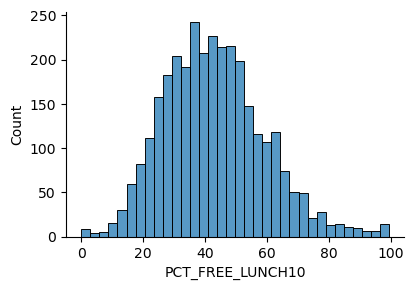

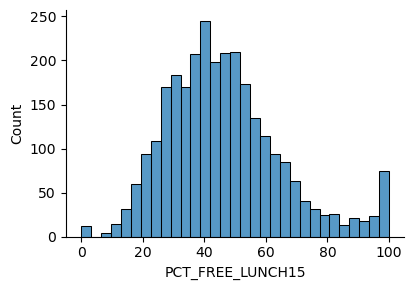

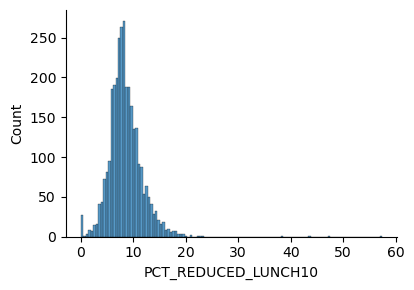

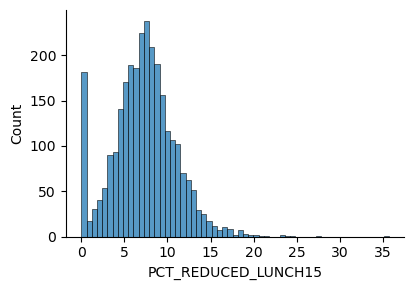

In [20]:
# compare distribution of two of the columns related to lunch programs that had high missing numbers 
mis_cols = ['PCT_FREE_LUNCH10','PCT_FREE_LUNCH15','PCT_REDUCED_LUNCH10','PCT_REDUCED_LUNCH15']
for c in mis_cols:
    sns.displot(data=df, x=c, height=3, aspect=11.7/8.27)

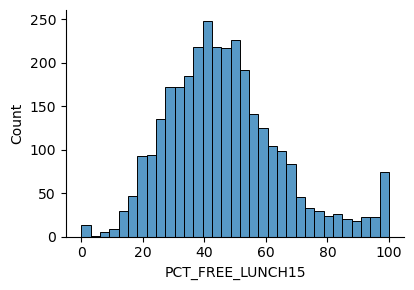

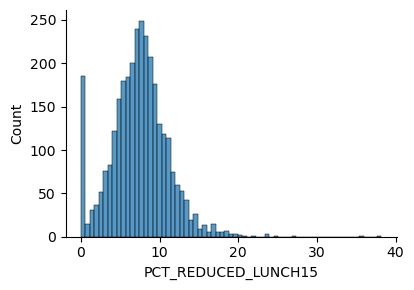

In [21]:
# Replace the nans in 2015 columns with values from 2010 for the same variable
df['PCT_FREE_LUNCH15'] = df.apply(lambda row: row['PCT_FREE_LUNCH10'] 
                                  if np.isnan(row['PCT_FREE_LUNCH15']) else row['PCT_FREE_LUNCH15'],axis=1)

df['PCT_REDUCED_LUNCH15'] = df.apply(lambda row: row['PCT_REDUCED_LUNCH10'] 
                                  if np.isnan(row['PCT_REDUCED_LUNCH15']) else row['PCT_REDUCED_LUNCH15'],axis=1)

# Check change in distribution
for c in ['PCT_FREE_LUNCH15','PCT_REDUCED_LUNCH15']:
    sns.displot(data=df, x=c, height=3, aspect=11.7/8.27)

Distribution does not change greatly. The unusual peaks at 0 and 100 can be attributed as unique characteristics of the dataset variables.  


In [22]:
# Only FOODHUB18 is left with missing values. This column does not have any 0 values so I will replace nans with 0s.
df[df['FOODHUB18']==0]

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13


In [23]:
df['FOODHUB18'] = df['FOODHUB18'].fillna(0)

In [24]:
# All missing values have been dealt with
df.columns[df.isna().any()].tolist()

[]

In [25]:
# Save cleaned dataframe
df.to_pickle(r'./../data/AtlasCleaned.pkl')